In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [5]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, (100,1)) # sklearn KNeighborsRegressor requirs the covariate input in a matrix form
y = reg(X).ravel() + np.random.normal(0, 5, 100)

In [6]:
X.shape, reg(X).shape, reg(X).ravel().shape, y.shape

((100, 1), (100, 1), (100,), (100,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
k = 5
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_test.shape

(20,)

In [11]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("R^2 Score:", r2_score(y_test, y_pred_test))

Mean Squared Error: 26.324300636884153
R^2 Score: 0.7515780938474486


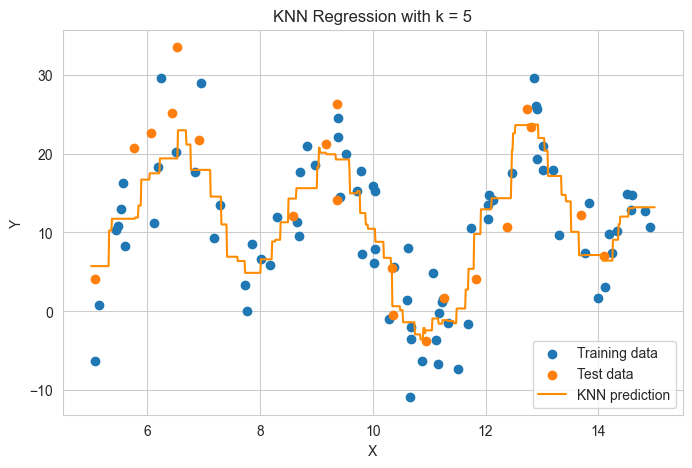

In [12]:
# Predict for plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:,0], y_train, label='Training data')
plt.scatter(X_test[:,0], y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000); y_plot = knn.predict(X_plot.reshape(-1, 1))
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {k}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

### Repeat the procedure $50$ times and report the avg MSE for various $k$, for Train and test data

In [3]:
Res = []
R = 50

for r in range(R):
    np.random.seed(r)
    X = np.random.uniform(5, 15, (100,1)) # sklearn KNeighborsRegressor requirs the covariate input in a matrix form
    y = reg(X).ravel() + np.random.normal(0, 5, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    errs = []
    for k in range(1,21):
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)

        y_pred_train = knn.predict(X_train); y_pred_test = knn.predict(X_test)
        trn_errs = mean_squared_error(y_train, y_pred_train)
        tst_errs = mean_squared_error(y_test, y_pred_test)
        
        errs.append([trn_errs, tst_errs])

    Res.append(errs)
    
Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='k', value=np.arange(1,21))
Res_df

,k,Avg Train error,Avg Test error
0,1,0.000000,51.159194
1,2,12.972024,41.041016
2,3,17.757850,36.664700
3,4,20.973392,36.481766
4,5,23.028646,36.821810
5,6,24.784259,35.906306
6,7,26.262941,37.178077
7,8,28.561236,38.716517
8,9,30.972313,40.398652
9,10,33.231768,41.952079


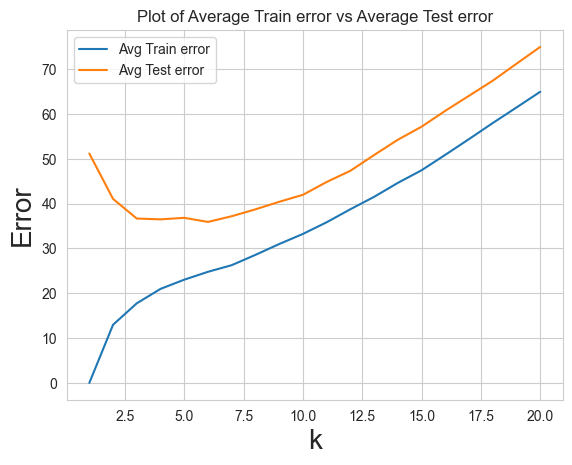

In [4]:
plt.plot(Res_df['k'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['k'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('k', fontsize=20); plt.ylabel('Error', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()